In [6]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import pandas as pd

In [22]:
data = [
    "problem of evil",
    "evil queen",
    "horizon problem"
]

# preparing data for our model, by counting the occurances of a 
# word in the data
vec = CountVectorizer()
X = vec.fit_transform(data)

# convert the data into pandas table
vis_data = pd.DataFrame(X.toarray(), columns=vec.get_feature_names_out())
print(vis_data)


   evil  horizon  of  problem  queen
0     1        0   1        1      0
1     1        0   0        0      1
2     0        1   0        1      0


In [23]:
# IF - IDF = term frequency * inverse document frequency
vec2 = TfidfVectorizer()
X2 = vec2.fit_transform(data)

vis_data = pd.DataFrame(X2.toarray(), columns=vec.get_feature_names_out())
print(vis_data)

       evil   horizon        of   problem     queen
0  0.517856  0.000000  0.680919  0.517856  0.000000
1  0.605349  0.000000  0.000000  0.000000  0.795961
2  0.000000  0.795961  0.000000  0.605349  0.000000


# Subject classifier

In [33]:
# import dataset
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
# cool feature
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [36]:
# by default training is done on cpu
# when working either change the training to use the gpu
# and/or reduce the dataset
categories = ["talk.religion.misc", "sci.space", "comp.graphics"]

# load the dataset
train = fetch_20newsgroups(subset= "train", categories= categories)
test = fetch_20newsgroups(subset= "test", categories= categories)

# prepare the data and create the model (used the make_pipeline method to be concise)
model = make_pipeline(TfidfVectorizer(), MultinomialNB())

# train the model
model.fit(train.data, train.target)

labels = model.predict(test.data)

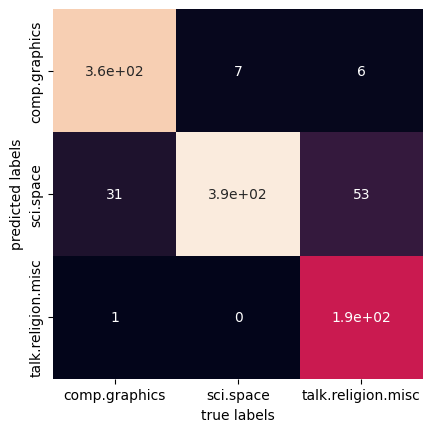

In [38]:
# plot the confusion matrix
conf_matrix = confusion_matrix(test.target, labels)
sns.heatmap(conf_matrix.T, square = True, annot = True, cbar = False, xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel("true labels")
plt.ylabel("predicted labels")
plt.show()

In [50]:
# classify an extra sentence!
s = "the stars were made on the second day"
pred = model.predict([s])
print(train.target_names[pred[0]])

sci.space
